In [68]:

from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)



2.8.0


In [69]:
dataset_path = keras.utils.get_file("housing.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")
dataset_path

'/root/.keras/datasets/housing.data'

From data source description:
1. CRIM:      per capita crime rate by town
2. ZN:        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS:     proportion of non-retail business acres per town
4. CHAS:      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX:       nitric oxides concentration (parts per 10 million)
6. RM:        average number of rooms per dwelling
7. AGE:       proportion of owner-occupied units built prior to 1940
8. DIS:       weighted distances to five Boston employment centres
9. RAD:       index of accessibility to radial highways
10. TAX:      full-value property-tax rate per 10K USD
11. PTRATIO:  pupil-teacher ratio by town
12. B:        1000(Bk - 0.63)^2 where Bk is the proportion of black population
13. LSTAT:    % lower status of the population
14. MEDV:     Median value of owner-occupied homes in $1000's

In [70]:
column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'MEDV']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,MEDV
0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [71]:
# Checking for nulls
dataset.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
MEDV       0
dtype: int64

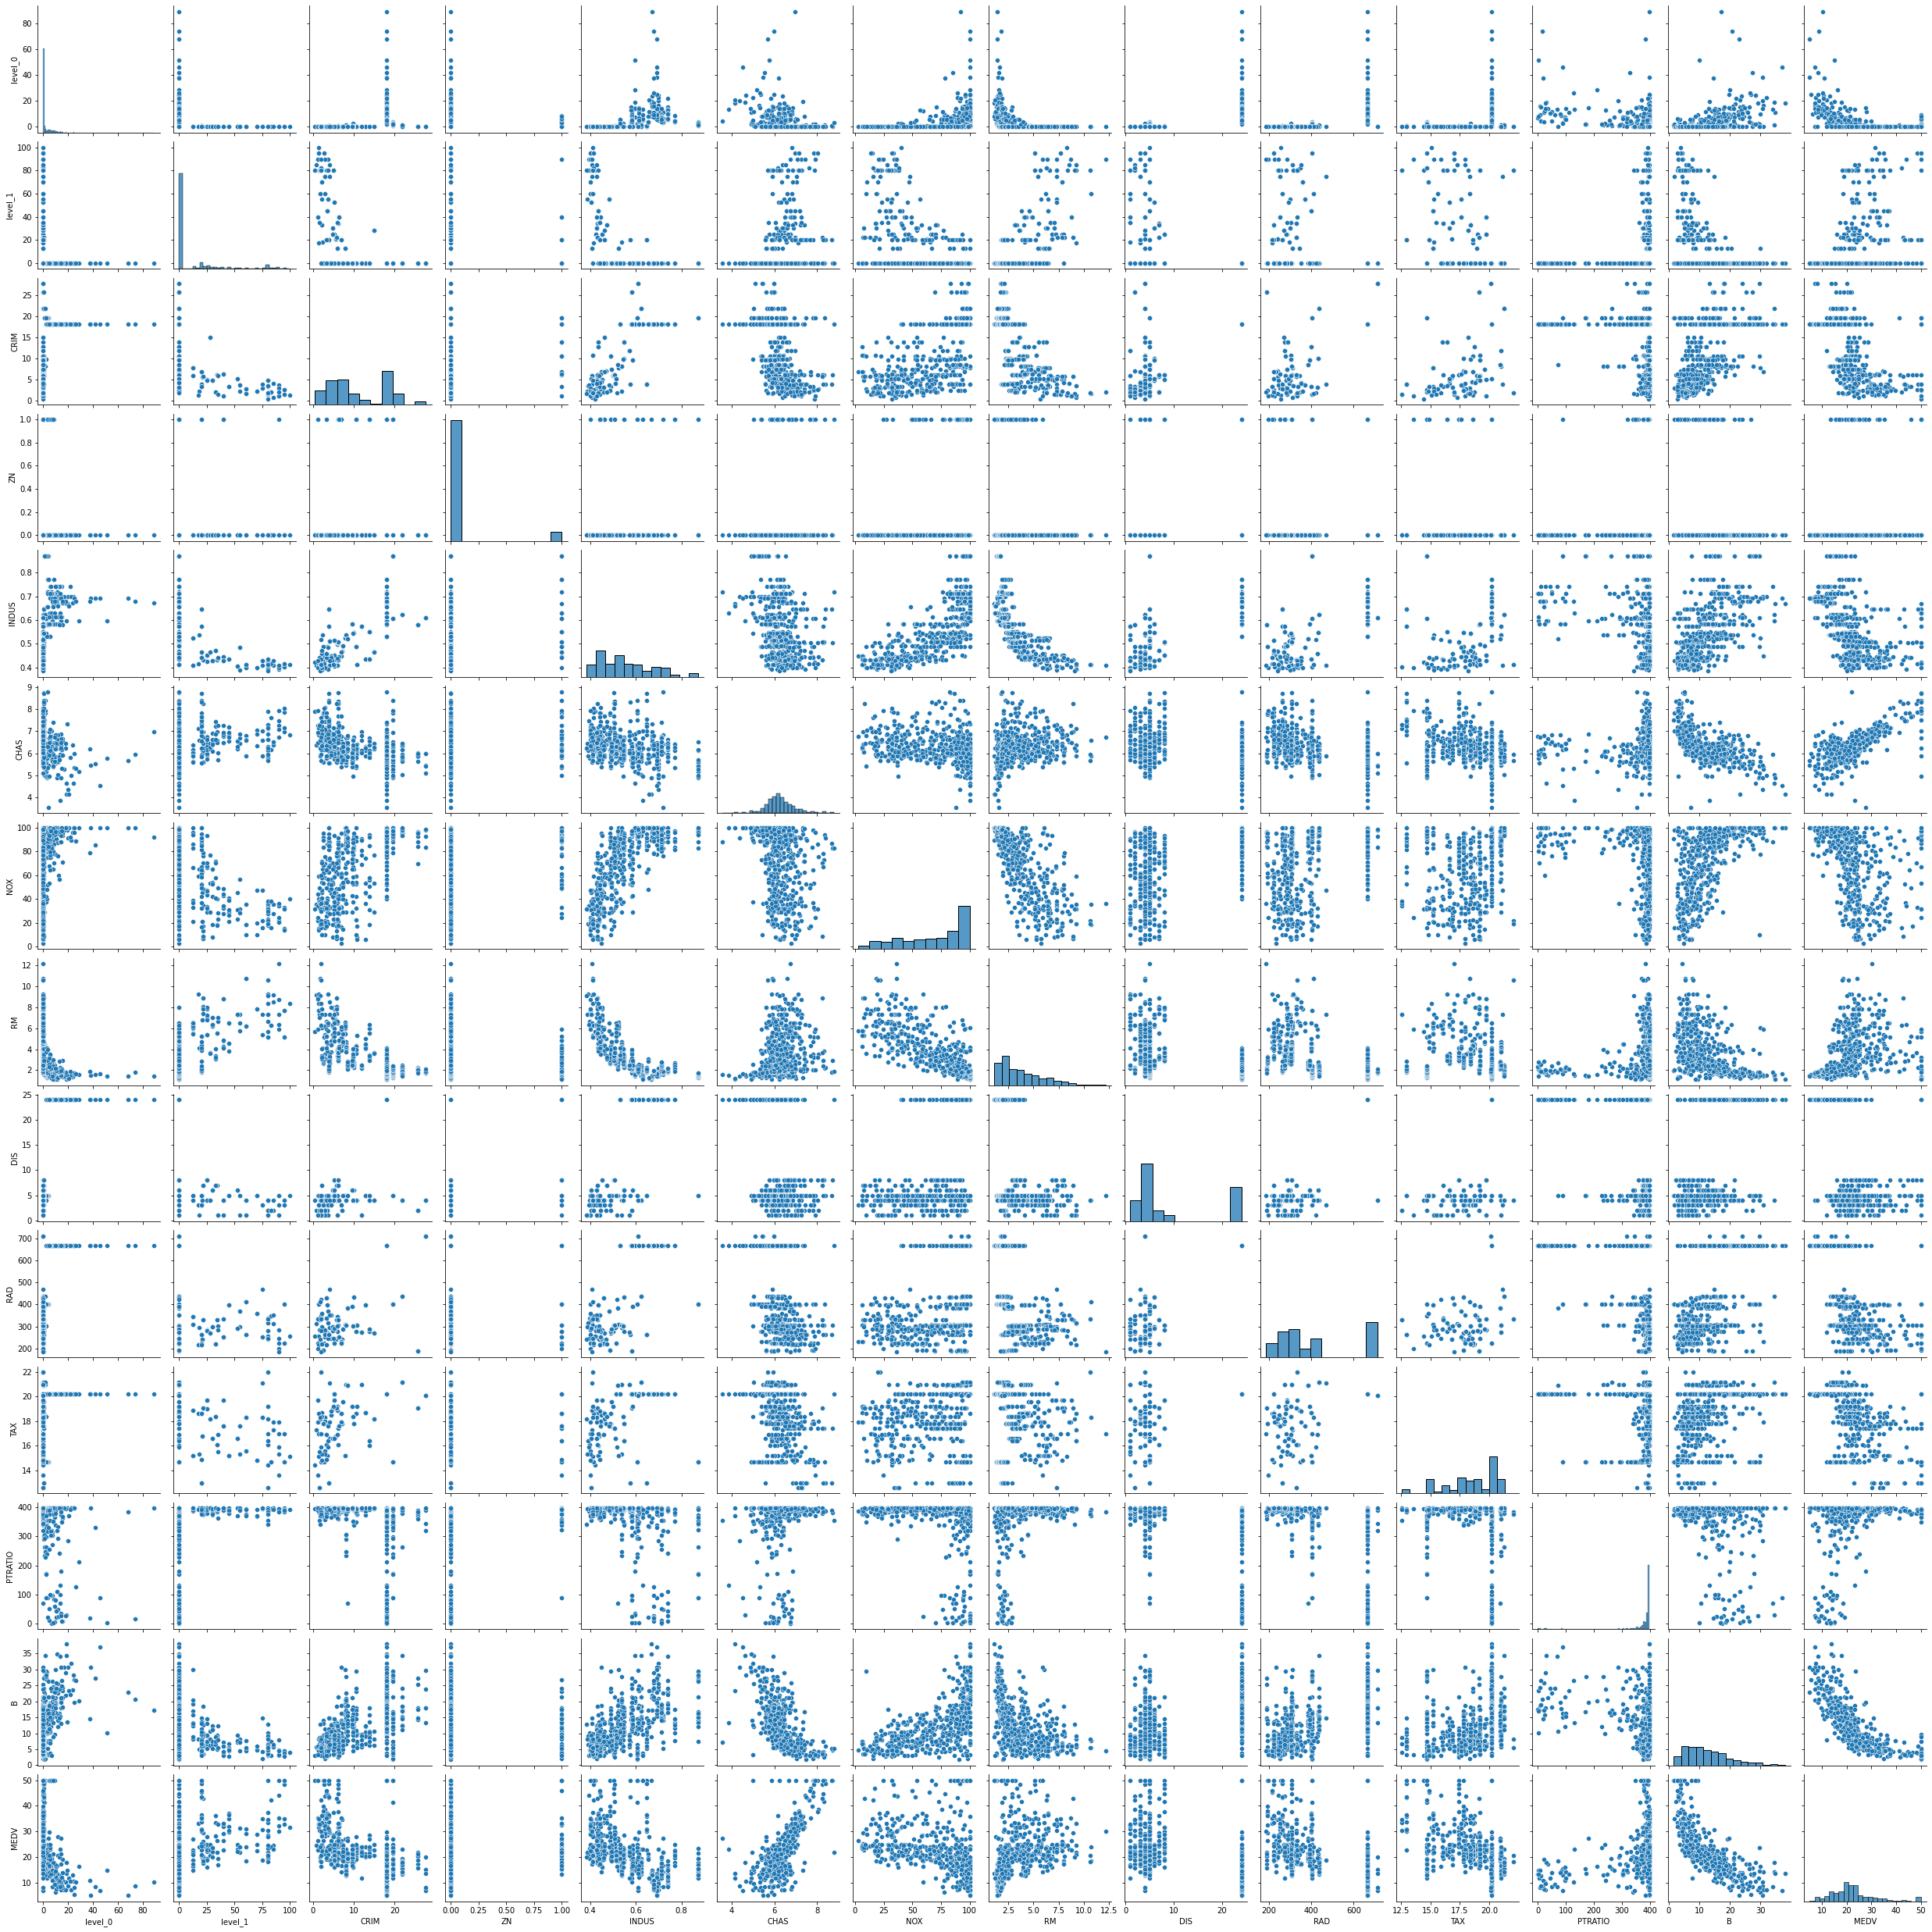

In [72]:
# Visually inspecting data for any obvious correlations 
dataset_pairplot = dataset.reset_index()
sns.pairplot(dataset_pairplot, diag_kind="hist")

In [73]:
# Setting up test / train data. 80 / 20 split
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# MEDV will be target
train_labels = train_dataset.pop('MEDV')
test_labels = test_dataset.pop('MEDV')


In [74]:
# Reviewing statistics about training set
train_stats = train_dataset.describe()
train_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,11.097951,0.069136,0.553098,6.269768,68.241975,3.834098,9.474074,405.839506,18.437037,356.276444,12.638914
std,6.699157,0.253999,0.115564,0.690552,27.908527,2.162173,8.618564,164.057951,2.141275,91.298597,7.090281
min,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000
25%,5.320000,0.000000,0.449000,5.878000,45.000000,2.078800,4.000000,284.000000,17.300000,375.210000,7.190000
50%,9.690000,0.000000,0.538000,6.193000,76.500000,3.272100,5.000000,334.000000,18.800000,391.230000,11.320000
75%,18.100000,0.000000,0.624000,6.619000,94.100000,5.214600,24.000000,666.000000,20.200000,396.240000,16.650000
max,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [75]:
# Normalizing data

train_stats_transpose = train_stats.transpose()

def norm(x):
    return (x - train_stats_transpose['mean']) / train_stats_transpose['std']
  
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_data

,,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B
0.06724,0.0,-1.172976,-0.272190,-0.805595,0.091567,-1.828903,0.638479,-0.635149,0.147268,-0.717814,0.207381,-0.747349
9.23230,0.0,1.045214,-0.272190,0.674104,-0.077862,1.137933,-1.232555,1.685423,1.585784,0.823324,0.108146,-0.438475
0.11425,0.0,0.416776,3.664838,-0.026806,0.149492,0.865614,-0.217743,-0.519121,-0.791425,-0.951319,0.410341,-0.301668
24.80170,0.0,1.045214,-0.272190,1.210603,-1.333380,0.994607,-0.985720,1.685423,1.585784,0.823324,0.444953,1.005755
0.05646,0.0,0.258547,-0.272190,-1.004618,-0.054692,-0.521059,0.545748,-0.519121,-0.047785,0.122807,0.329945,-0.042158
...,...,...,...,...,...,...,...,...,...,...,...,...
0.21038,20.0,-1.159542,-0.272190,-0.953564,0.785216,-1.291432,0.123303,-0.519121,-1.157149,-1.651837,0.444953,-1.098534
0.41238,0.0,-0.731129,-0.272190,-0.424853,1.293505,0.417723,-0.286008,-0.171035,-0.602467,-0.484308,0.173097,-0.885566
2.33099,0.0,1.266137,-0.272190,2.750874,-1.569423,0.915778,-1.065825,-0.519121,-0.017308,-1.745239,0.007816,2.211631
4.09740,0.0,1.266137,-0.272190,2.750874,-1.161054,1.137933,-1.120307,-0.519121,-0.017308,-1.745239,0.444953,1.943659


In [76]:
# Building model

'''
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

A Dense layer is a regular deeply connected neural network layer. It is most common and frequently used layer
'''

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model


In [77]:
model = build_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                768       
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Quickly test model
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.29719865],
       [-0.0657609 ],
       [-0.236964  ],
       [-0.2802026 ],
       [-0.16874301],
       [-0.01637064],
       [-0.1347496 ],
       [ 0.08294602],
       [ 0.11296242],
       [-0.09784707]], dtype=float32)

In [79]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 1000 == 0:
      print(f'\n{epoch}')
    if epoch % 100 == 0:
      print('.', end='')

In [80]:
history = model.fit(
  normed_train_data, train_labels,
  epochs=10000, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


0
..........
1000
..........
2000
..........
3000
..........
4000
..........
5000
..........
6000
..........
7000
..........
8000
..........
9000
..........

In [81]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8, 6), dpi=120)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MEDV]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure(figsize=(8, 6), dpi=120)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MEDV^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

In [82]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
9995,0.083380,0.220910,0.083380,15.576294,2.981926,15.576294,9995
9996,0.125448,0.273247,0.125448,16.753029,3.028366,16.753029,9996
9997,0.072440,0.196367,0.072440,13.806261,2.877163,13.806261,9997
9998,0.089482,0.207353,0.089482,17.326103,3.063123,17.326103,9998
9999,0.114839,0.264862,0.114839,15.470786,2.968515,15.470786,9999


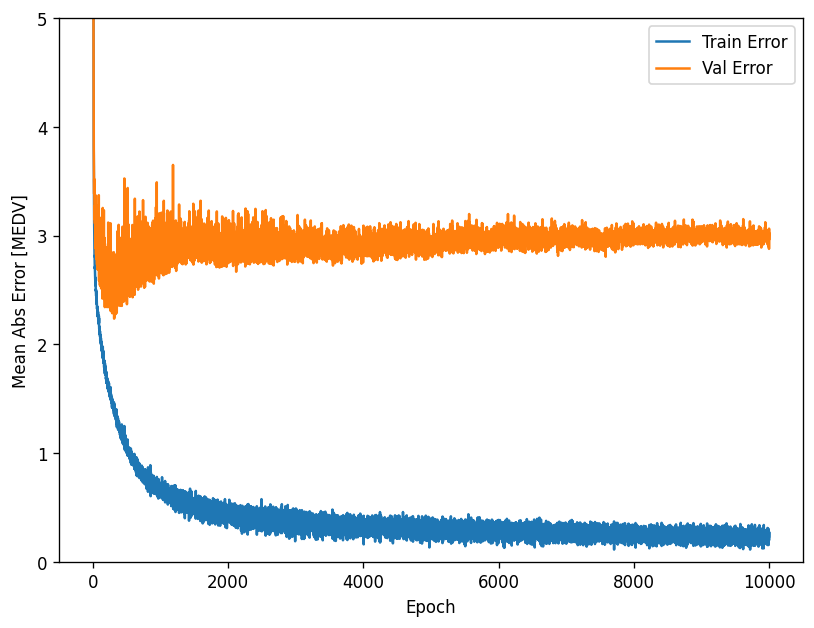

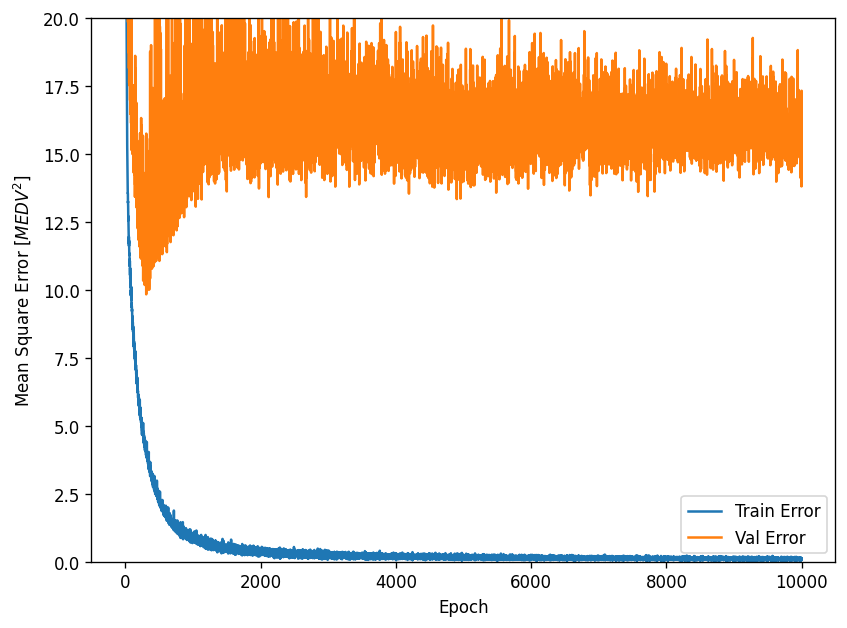

In [83]:
# Display plots to see if model is under- or over-fitting
plot_history(history)

In [84]:
def predict_medv_record(model, record_index):
  record = dataset.iloc[[record_index]]
  record_input = dataset[['CRIM','ZN','INDUS','CHAS','NOX','RM','DIS','RAD','TAX','PTRATIO','B']].iloc[[record_index]]

  result = model.predict(norm(record_input))
  print('Prediction result: ' + str(result[0][0]))
  print('Actual result:     ' + str(record['MEDV'].values[0]))
  diff = float(record['MEDV'].values[0]) - float(result[0][0])
  print('Abs Difference:    ' + str(round(abs(diff),4)))

predict_medv_record(model,10)


Prediction result: 15.321171
Actual result:     15.0
Abs Difference:    0.3212


### First Model Iteration Performance
First model is performing moderately well but not great. In looking at the previous charts, the validation error is much higher than the training error indicating that the model is overfitting. Regularization through dropout layers is the next step

In [85]:
# Building second model

'''
A Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.

This model's architecture also changed to more of a conal architecture
'''

def build_model_revised():
  model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dropout(.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(.5),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [86]:
model_revised = build_model_revised()
model_revised.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               1536      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                

In [87]:
history_revised = model_revised.fit(
  normed_train_data, train_labels,
  epochs=10000, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


0
..........
1000
..........
2000
..........
3000
..........
4000
..........
5000
..........
6000
..........
7000
..........
8000
..........
9000
..........

In [88]:
hist = pd.DataFrame(history_revised.history)
hist['epoch'] = history_revised.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
9995,9.522496,2.132542,9.522496,10.119616,2.306619,10.119616,9995
9996,13.043148,2.403742,13.043148,9.839027,2.308257,9.839027,9996
9997,11.349018,2.200036,11.349018,10.432183,2.389870,10.432183,9997
9998,10.885482,2.152732,10.885482,11.130354,2.358158,11.130354,9998
9999,9.508862,2.129826,9.508862,10.424031,2.412723,10.424031,9999


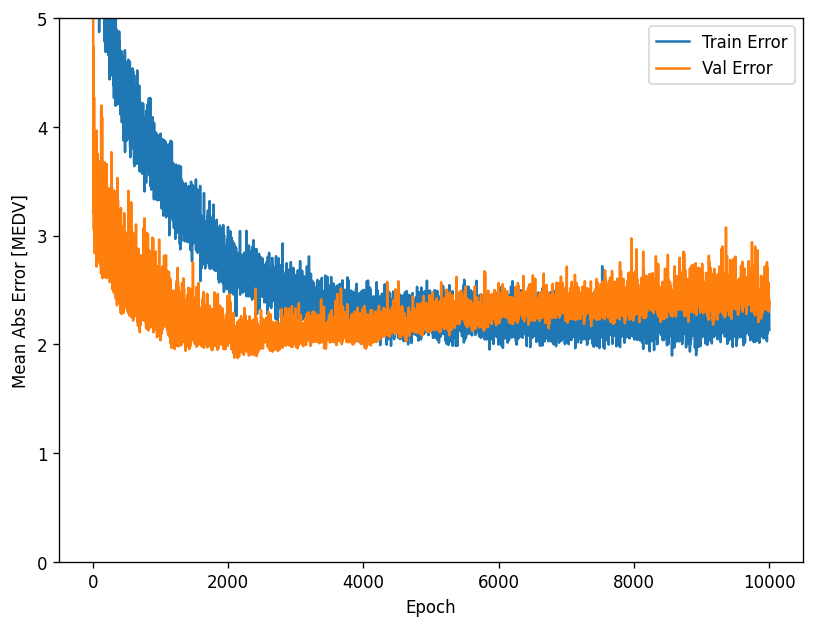

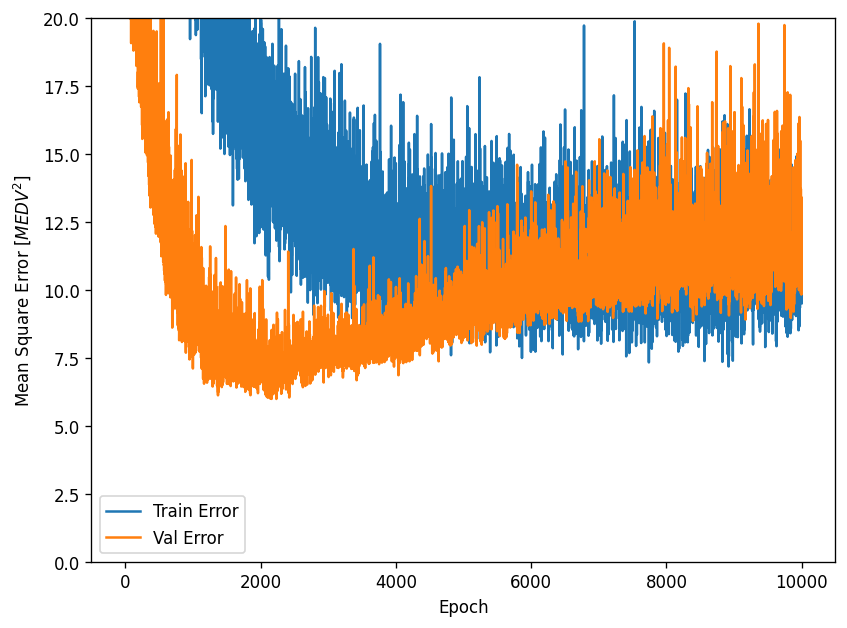

In [89]:
plot_history(history_revised)

In [92]:
for i in range(0,15):
  predict_medv_record(model_revised,i)
  print('-----')

Prediction result: 23.289206
Actual result:     24.0
Abs Difference:    0.7108
-----
Prediction result: 22.179638
Actual result:     21.6
Abs Difference:    0.5796
-----
Prediction result: 30.343021
Actual result:     34.7
Abs Difference:    4.357
-----
Prediction result: 31.564396
Actual result:     33.4
Abs Difference:    1.8356
-----
Prediction result: 30.815228
Actual result:     36.2
Abs Difference:    5.3848
-----
Prediction result: 25.115444
Actual result:     28.7
Abs Difference:    3.5846
-----
Prediction result: 21.584465
Actual result:     22.9
Abs Difference:    1.3155
-----
Prediction result: 22.150928
Actual result:     27.1
Abs Difference:    4.9491
-----
Prediction result: 16.678108
Actual result:     16.5
Abs Difference:    0.1781
-----
Prediction result: 21.877052
Actual result:     18.9
Abs Difference:    2.9771
-----
Prediction result: 16.678108
Actual result:     15.0
Abs Difference:    1.6781
-----
Prediction result: 21.802639
Actual result:     18.9
Abs Differenc